<a href="https://colab.research.google.com/github/optimizationworld/MachineLearning-SupervisedLearning/blob/main/LR_Ridge_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('oilprice2025.csv',parse_dates=['Date'])
data.head()

<ipython-input-2-1087364451>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('oilprice2025.csv',parse_dates=['Date'])


,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [3]:
data = data.sort_values('Date')

# Set the date as index (optional for plotting)
data.set_index('Date', inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9915 entries, 1986-01-02 to 2025-05-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9915 non-null   float64
dtypes: float64(1)
memory usage: 154.9 KB


In [5]:
for i in range(1, 6):
    data[f'lag_{i}'] = data['Price'].shift(i)

# Drop rows with NaN values caused by shifting
data = data.dropna()

In [6]:
#codigo mejorado
if 'Price' in data.columns:
    for i in range(1, 6):
        data[f'lag_{i}'] = data['Price'].shift(i)
    data = data.dropna()
else:
    print("La columna 'Price' no existe. Columnas disponibles:", data.columns)

In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[[f'lag_{i}' for i in range(1, 6)]]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [8]:
#verificamos que no haya NAN en x and Y
print(X.isnull().sum())
print(y.isnull().sum())

lag_1    0
lag_2    0
lag_3    0
lag_4    0
lag_5    0
dtype: int64
0


In [9]:
#Modelo base
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelo base
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción
y_pred_lr = lr.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"LinearRegression - MSE: {mse_lr:.4f} | R²: {r2_lr:.4f}")


LinearRegression - MSE: 5.3925 | R²: 0.9830


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir grid de hiperparámetros
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Búsqueda con validación cruzada
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluación
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge - Mejor alpha: {grid_search.best_params_['alpha']} | MSE: {mse_ridge:.4f} | R²: {r2_ridge:.4f}")


Ridge - Mejor alpha: 10 | MSE: 5.3908 | R²: 0.9830


In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
# Definir valores de alpha a probar
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Inicializar modelo Lasso
lasso = Lasso(max_iter=10000)  # Aumentamos max_iter por si tarda en converger

# Buscar el mejor alpha con validación cruzada
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

# Obtener mejor modelo
best_lasso = grid_lasso.best_estimator_
# Predicciones
y_pred_lasso = best_lasso.predict(X_test)

# Evaluación
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Resultados
print(f"Lasso - Mejor alpha: {grid_lasso.best_params_['alpha']} | MSE: {mse_lasso:.4f} | R²: {r2_lasso:.4f}")


Lasso - Mejor alpha: 0.01 | MSE: 5.4056 | R²: 0.9830


In [12]:
print("Comparación final:")
print(f"LinearRegression -> MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Ridge optimizado -> MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Lasso optimizado -> MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")


Comparación final:
LinearRegression -> MSE: 5.3925, R²: 0.9830
Ridge optimizado -> MSE: 5.3908, R²: 0.9830
Lasso optimizado -> MSE: 5.4056, R²: 0.9830


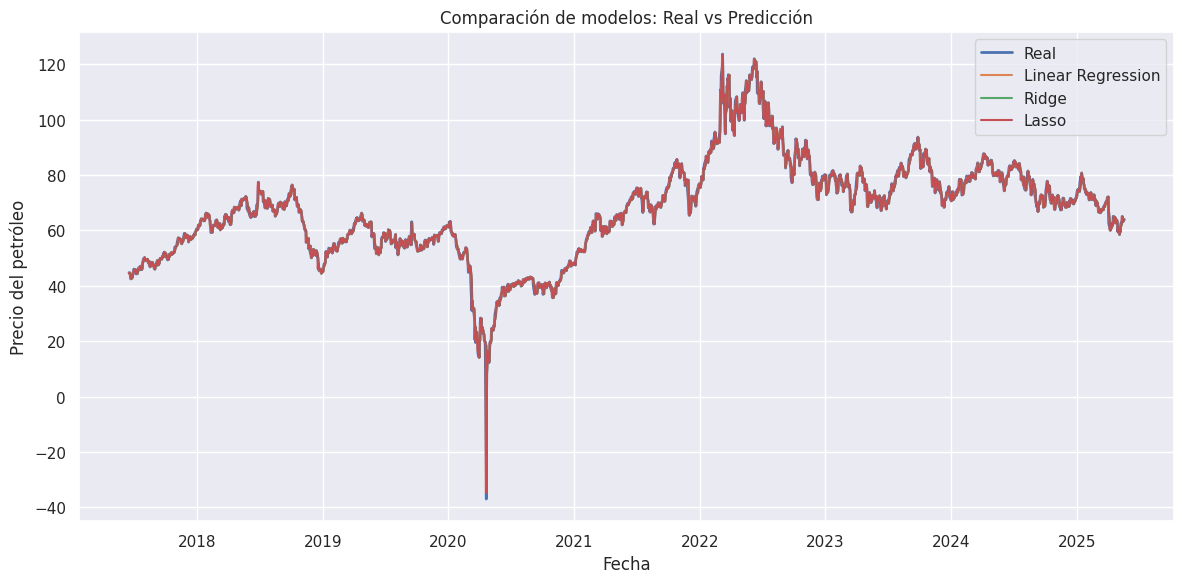

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Real', linewidth=2)
plt.plot(y_test.index, y_pred_lr, label='Linear Regression')
plt.plot(y_test.index, y_pred_ridge, label='Ridge')
plt.plot(y_test.index, y_pred_lasso, label='Lasso')
plt.title('Comparación de modelos: Real vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio del petróleo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import plotly.graph_objects as go

# Crear la figura interactiva
fig = go.Figure()

# Valores reales
fig.add_trace(go.Scatter(x=y_test.index, y=y_test.values,
                         mode='lines', name='Real',
                         line=dict(color='black', width=2)))

# Linear Regression
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_lr,
                         mode='lines', name='Linear Regression',
                         line=dict(dash='dash')))

# Ridge
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_ridge,
                         mode='lines', name=f'Ridge (alpha={grid_search.best_params_["alpha"]})',
                         line=dict(dash='dot')))

# Lasso
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_lasso,
                         mode='lines', name=f'Lasso (alpha={grid_lasso.best_params_["alpha"]})',
                         line=dict(dash='longdash')))

# Configurar el diseño
fig.update_layout(
    title='Comparación Interactiva de Modelos: Precio Real vs Predicho',
    xaxis_title='Fecha',
    yaxis_title='Precio del Petróleo',
    hovermode='x unified',
    template='plotly_white',
    width=1000,
    height=600
)

# Mostrar gráfico interactivo
fig.show()


In [15]:
# Crear tabla de comparación
tabla_comparacion = pd.DataFrame({
    'Modelo': [
        'Linear Regression',
        f'Ridge (alpha={grid_search.best_params_["alpha"]})',
        f'Lasso (alpha={grid_lasso.best_params_["alpha"]})'
    ],
    'Error cuadrático medio (MSE)': [mse_lr, mse_ridge, mse_lasso],
    'Coeficiente de determinación (R²)': [r2_lr, r2_ridge, r2_lasso]
})

# Mostrar tabla en pantalla
print(tabla_comparacion)

               Modelo  Error cuadrático medio (MSE)  \
0   Linear Regression                      5.392454   
1    Ridge (alpha=10)                      5.390813   
2  Lasso (alpha=0.01)                      5.405624   

   Coeficiente de determinación (R²)  
0                           0.982998  
1                           0.983003  
2                           0.982956  


In [16]:
# Crear tabla de comparación
tabla_comparacion = pd.DataFrame({
    'Modelo': [
        'Linear Regression',
        f'Ridge (alpha={grid_search.best_params_["alpha"]})',
        f'Lasso (alpha={grid_lasso.best_params_["alpha"]})'
    ],
    'Error cuadrático medio (MSE)': [mse_lr, mse_ridge, mse_lasso],
    'Coeficiente de determinación (R²)': [r2_lr, r2_ridge, r2_lasso]
})

# Mostrar tabla en pantalla
print(tabla_comparacion)

# Find the best model based on MSE (lowest is best) and R2 (highest is best)
# Sort by 'Error cuadrático medio (MSE)' in ascending order for the best MSE
mejor_mse = tabla_comparacion.sort_values('Error cuadrático medio (MSE)').iloc[0]
# Sort by 'Coeficiente de determinación (R²)' in descending order for the best R2
mejor_r2 = tabla_comparacion.sort_values('Coeficiente de determinación (R²)', ascending=False).iloc[0]


# Generar interpretación textual
resumen = f"""
De acuerdo con los resultados obtenidos:

- El modelo con el menor error cuadrático medio (MSE) es **{mejor_mse['Modelo']}**, con un MSE de {mejor_mse['Error cuadrático medio (MSE)']:.4f}.
- El modelo con el mayor coeficiente de determinación (R²) es **{mejor_r2['Modelo']}**, con un R² de {mejor_r2['Coeficiente de determinación (R²)']:.4f}.

Esto sugiere que el modelo {mejor_mse['Modelo']} ofrece la mejor capacidad predictiva en términos de precisión, mientras que el modelo {mejor_r2['Modelo']} explica la mayor proporción de la variabilidad en los datos.

Ambos criterios (precisión y explicación) deben considerarse en conjunto para seleccionar el modelo más adecuado para la predicción del precio del petróleo.
"""

print(resumen)

               Modelo  Error cuadrático medio (MSE)  \
0   Linear Regression                      5.392454   
1    Ridge (alpha=10)                      5.390813   
2  Lasso (alpha=0.01)                      5.405624   

   Coeficiente de determinación (R²)  
0                           0.982998  
1                           0.983003  
2                           0.982956  

De acuerdo con los resultados obtenidos:

- El modelo con el menor error cuadrático medio (MSE) es **Ridge (alpha=10)**, con un MSE de 5.3908.
- El modelo con el mayor coeficiente de determinación (R²) es **Ridge (alpha=10)**, con un R² de 0.9830.

Esto sugiere que el modelo Ridge (alpha=10) ofrece la mejor capacidad predictiva en términos de precisión, mientras que el modelo Ridge (alpha=10) explica la mayor proporción de la variabilidad en los datos.

Ambos criterios (precisión y explicación) deben considerarse en conjunto para seleccionar el modelo más adecuado para la predicción del precio del petróleo.



In [50]:
import numpy as np
from scipy.stats import ttest_rel

# Errores (por defecto MSE)
e_lr = (y_test.values - y_pred_lr) ** 2
e_ridge = (y_test.values - y_pred_ridge) ** 2
e_lasso = (y_test.values - y_pred_lasso) ** 2

# Diferencias de errores entre modelos
diff_ridge = e_lr - e_ridge
diff_lasso = e_lr - e_lasso

# Prueba t pareada (equivalente simplificado a Diebold-Mariano)
stat_ridge, p_ridge = ttest_rel(e_lr, e_ridge)
stat_lasso, p_lasso = ttest_rel(e_lr, e_lasso)

# Resultados
print(f"Comparación LinearRegression vs Ridge:")
print(f"  t = {stat_ridge:.4f}, p = {p_ridge:.4f} {'→ Diferencia significativa' if p_ridge < 0.05 else ''}")

print(f"Comparación LinearRegression vs Lasso:")
print(f"  t = {stat_lasso:.4f}, p = {p_lasso:.4f} {'→ Diferencia significativa' if p_lasso < 0.05 else ''}")



Comparación LinearRegression vs Ridge:
  t = 0.7488, p = 0.4541 
Comparación LinearRegression vs Lasso:
  t = -0.6869, p = 0.4923 


In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 2.20


In [8]:
import plotly.graph_objects as go
import pandas as pd

# Rebuild datetime index for the test set
X_test_dates = data.index[-len(y_test):]

# Create a DataFrame for plotting
# Corrected: Use pd.DataFrame to create a new DataFrame
plot_df = pd.DataFrame({
    'date': X_test_dates,
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Create interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=plot_df['date'],
    y=plot_df['Actual Price'],
    mode='lines',
    name='Actual Price',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=plot_df['date'],
    y=plot_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='orange')
))

fig.update_layout(
    title='Oil Price Forecast',
    xaxis_title='Year',
    yaxis_title='Oil Price',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    template='plotly_white'
)

fig.show()

In [9]:
latest_data = data[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].iloc[-1].values.reshape(1, -1)
future_price = model.predict(latest_data)
print(f"Predicted next price: {future_price[0]:.2f}")


Predicted next price: 63.86


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

# Create the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,                # number of combinations to try
    scoring='neg_root_mean_squared_error',
    cv=3,                     # 3-fold cross-validation
    verbose=1,
    n_jobs=-1                 # use all available cores
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
# Calculate MSE first
mse = mean_squared_error(y_test, y_pred)
# Then calculate RMSE manually by taking the square root
print(f"Best RMSE: {rmse:.2f}")
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best RMSE: 2.20
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


In [14]:
model = XGBRegressor(
          objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.6,
    colsample_bytree=1,
    gamma=0,
    min_child_weight=1,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

In [ ]:
pip install optuna

In [16]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    model = XGBRegressor(objective='reg:squarederror', random_state=42, **params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # Then calculate RMSE manually by taking the square root
    rmse = np.sqrt(mse)
    return rmse


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

In [21]:
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)

# Final model with best params
best_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **study.best_params
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Best RMSE: 2.1540156290783323
Best Hyperparameters: {'n_estimators': 970, 'max_depth': 5, 'learning_rate': 0.010007782300754392, 'subsample': 0.7818882286568447, 'colsample_bytree': 0.9761071858202495, 'gamma': 0.4179241552602041, 'min_child_weight': 2}


In [26]:
print("\n--- Model Performance Comparison ---")

# Access the best RMSE from RandomizedSearchCV (negative of best score)
rmse_random_search = -random_search.best_score_
print(f"RandomizedSearchCV RMSE: {rmse_random_search:.2f}")

# Access the best RMSE directly from the Optuna study object
print(f"Optuna RMSE:              {study.best_value:.2f}\n")

print("Best Params from RandomizedSearchCV:")
print(random_search.best_params_)

print("\nBest Params from Optuna:")
# Access the best params directly from the Optuna study object
print(study.best_params)


--- Model Performance Comparison ---
RandomizedSearchCV RMSE: 6.44
Optuna RMSE:              2.15

Best Params from RandomizedSearchCV:
{'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}

Best Params from Optuna:
{'n_estimators': 970, 'max_depth': 5, 'learning_rate': 0.010007782300754392, 'subsample': 0.7818882286568447, 'colsample_bytree': 0.9761071858202495, 'gamma': 0.4179241552602041, 'min_child_weight': 2}


In [28]:
# Import Optuna visualization
import optuna.visualization as ov

# Plot optimization history
fig_history = ov.plot_optimization_history(study)
fig_history.update_layout(title='Optuna Optimization History (RMSE)')
fig_history.show()

# Plot parameter importances
fig_importance = ov.plot_param_importances(study)
fig_importance.update_layout(title='Optuna Parameter Importances')
fig_importance.show()

# You can explore other plots like plot_slice or plot_parallel_coordinate as well:
#fig_slice = ov.plot_slice(study)
#fig_slice.show()

#fig_parallel = ov.plot_parallel_coordinate(study)
#fig_parallel.show()